### Environment: Minority Game
#### O. Osoba
#### Date: Jan-2019
Exploring implementation of minority game with N players. <br> 
Issues: <br>
- Appropriate decomposition of agent<->env<br>
- Demo'ing: <br>
    - basic minority game
    - 1-vs.-(N-1)
    - k-vs.-(N-k)
    - RF on 1-v-(N-1) mingame
- Differences between std agent adaptation and REINFORCE adaptation? <br>

## Preamble: Libs + signal def

In [2]:
import glob, itertools, importlib, sys

import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# ML libs
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18,7)

log_path = './log/mingame'
#tensorboard --logdir=mingame_worker_1:'./log/train_rf_mingame_worker'

Tensorflow version: 1.13.1


## Basic MinGame env

([1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1], 0)


(<Figure size 1296x504 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7478831a58>,
       dtype=object))

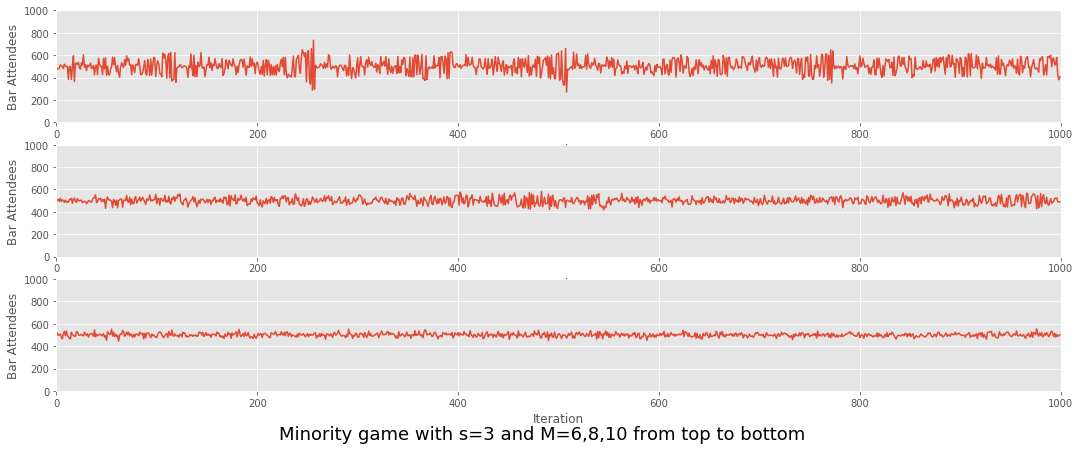

In [9]:
import minoritygame.minority_base as MGA
importlib.reload(MGA)
basegame = MGA.MinorityGame(nagents=33, m=3, s=4)
print(basegame.step())

MGA.repro_fig_1()

# acts = basegame.step()[0]
# print(acts, np.mean(acts))
# Counter(acts).most_common()[-1][0]

In [9]:
def repro_fig_2():
    """                                                                                                                                                                                                            
    The Minority Game: an introductory guide by Esteban Moro                                                                                                                                                                       
    """
    game1 = MGA.MinorityGame(301, 2, 2)
    g1y = [np.sum(game1.step()[0]) for x in range(500)]
    game2 = MGA.MinorityGame(301, 7, 2)
    g2y = [np.sum(game2.step()[0]) for x in range(500)]
    game3 = MGA.MinorityGame(301, 15, 2)
    g3y = [np.sum(game3.step()[0]) for x in range(500)]
    fig, axes = plt.subplots(3)
    ys = [g1y, g2y, g3y]
    [axes[i].plot(ys[i]) for i in range(3)]
    [ax.set_ylim(0, 301) for ax in axes]
    [ax.set_xlim(0, 500) for ax in axes]
    [ax.set_xlabel('Iteration') for ax in axes]
    [ax.set_ylabel('Bar Attendees') for ax in axes]
    fig.text(.5, .03,
             'Minority game with s=2 and M=3,7,15 from top to bottom',
             ha='center', fontsize=18)
    return fig, axes


([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0], 0)


(<Figure size 432x288 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e1f0501d0>,
       dtype=object))

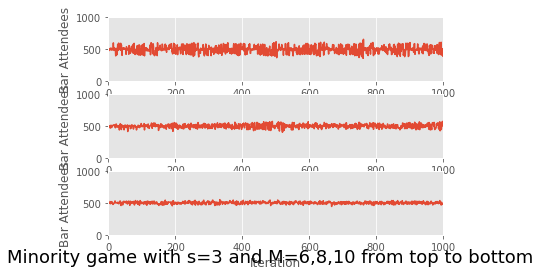

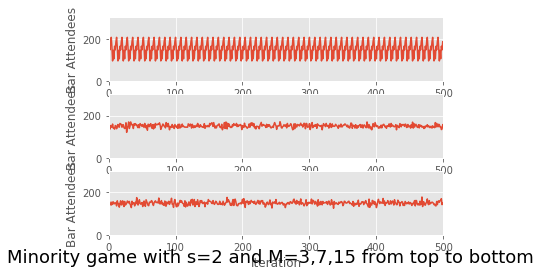

In [3]:
import minoritygame.minority_base as MGA
importlib.reload(MGA)
basegame = MGA.MinorityGame(nagents=33, m=3, s=4)
print(basegame.step())

repro_fig_2()

In [10]:
game1 = MGA.MinorityGame(301, 2, 2)
g1y = [np.sum(game1.step()[0]) for x in range(500)]

## 1-vs-(N-1) Mingame Env

In [12]:
import minoritygame.minority_env as MGE
importlib.reload(MGE) 

mingame = MGE.MinorityGame1vN_env(nagents=33, m=3, s=4)

In [13]:
tmp = mingame.stepAll()
print(Counter(tmp[1]).most_common()[-1][0], tmp[-1])
print(tmp)

0 0
(array([1, 0, 0]), [1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0], 0)


## k-vs-(N-k) Mingame Env

In [14]:
import minoritygame.minority_env as MGE
importlib.reload(MGE) 

exos=(np.random.sample(33)<0.3)  # np.sum(exos)
multmingame = MGE.MinorityGame_Multiagent_env(nagents=33, m=3, s=4, exo_actorsQ=exos)

In [15]:
tmp = multmingame.stepAll()
print(Counter(tmp[1]).most_common()[-1][0], tmp[-1])
print(tmp)

1 1
(array([0, 1, 1]), [1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0], 1)


In [16]:
Counter(tmp[1]).most_common()

[(0, 19), (1, 14)]

In [17]:
print(multmingame.actor_count, multmingame.actor_index)

11 [2, 9, 12, 14, 16, 17, 21, 26, 27, 28, 30]


In [18]:
list(zip(range(multmingame.nagents), multmingame.actor_exoQ))

[(0, False),
 (1, False),
 (2, True),
 (3, False),
 (4, False),
 (5, False),
 (6, False),
 (7, False),
 (8, False),
 (9, True),
 (10, False),
 (11, False),
 (12, True),
 (13, False),
 (14, True),
 (15, False),
 (16, True),
 (17, True),
 (18, False),
 (19, False),
 (20, False),
 (21, True),
 (22, False),
 (23, False),
 (24, False),
 (25, False),
 (26, True),
 (27, True),
 (28, True),
 (29, False),
 (30, True),
 (31, False),
 (32, False)]

In [19]:
print(multmingame.h, multmingame.state)

011 [0 1 1]


## RF on 1-vs-(N-1) Mingame Env

In [20]:
sys.path.append('./embodied_arch')

In [21]:
import minoritygame.minority_env as MGE
import tensorflow as tf
import embodied as emg

In [22]:
importlib.reload(MGE)

<module 'minoritygame.minority_env' from '/home/justin/Documents/projects/aiabm/multiagentABM/minoritygame/minority_env.py'>

In [23]:
importlib.reload(emg)

<module 'embodied' from './embodied_arch/embodied.py'>

In [24]:
tf.reset_default_graph()
menv = MGE.MinorityGame1vN_env(nagents=33, m=3, s=4, p=0.5)
embrf = emg.EmbodiedAgentRF(
    name="mgRF",
    env_=menv,
    alpha=5.e-2
)
print(menv.state_space_size, menv.action_space_size)

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Colocations handled automatically by placer.
3 1


In [25]:
num_episodes = 15
n_epochs = 101

embrf.max_episode_length = 30 #101  # dangerous... may incentivize finite n behavior
print(embrf, embrf.s_size, embrf.a_size)

sess = tf.InteractiveSession()
embrf.init_graph(sess) # note tboard log dir

## Verify step + play set up
state = embrf.env.reset()
print(state, embrf.act(state, sess))

embrf.env.step(embrf.act(state, sess))
embrf.play(sess)
print(embrf.last_total_return)

<embodied.EmbodiedAgentRF object at 0x7f4e5cfccd30> 3 1
Tensorboard logs in:  ./log/train_mgRF
[0. 1. 1.] 1
17.0


In [26]:
state

array([0., 1., 1.])

In [ ]:
# ### Pre-test Agent
print('Baselining untrained pnet...', flush=True)
rwd_mg0 = []
for k in range(num_episodes):
    embrf.play(sess)
    rwd_mg0.append(float(embrf.last_total_return)/embrf.max_episode_length)
    if k%int(num_episodes/5) == 0: print("\rEpisode {}/{}".format(k, num_episodes),end="")
base_perf_mg = np.mean(rwd_mg0)
print("\nAgent wins an average of {} pct".format(100.0*base_perf_mg), flush=True)

In [ ]:
# ### Train Agent w/ Algo on Experience Tuples
# Train pnet on mingame episodes
print('Training...')
saver = tf.train.Saver(max_to_keep=1)
embrf.work(sess, saver, num_epochs = n_epochs)

In [ ]:
# ### Post-test Agent# Test pnet!
print('Testing...', flush=True)
rwd_mg = []
for k in range(num_episodes):
    embrf.play(sess)
    rwd_mg.append(float(embrf.last_total_return)/embrf.max_episode_length)
    if k%int(num_episodes/5) == 0: print("\rEpisode {}/{}".format(k, num_episodes),end="")
trained_perf_mg = np.mean(rwd_mg)
print("\nAgent wins an average of {} pct \ncompared to baseline of {} pct".format(
    100*trained_perf_mg, 100*base_perf_mg), flush=True )

In [ ]:
import seaborn as sns
fig, axs = plt.subplots(2, 1, sharex=True)
sns.boxplot(rwd_mg0, ax = axs[0])
axs[0].set_title('Baseline Mean Success Percentage')
sns.boxplot(rwd_mg, ax = axs[1])
axs[1].set_title('Trained Mean Success Percentage')

sess.close()

In [8]:
basegame = MGA.MinorityGame(nagents=33, m=3, s=4)

In [ ]:
%timeit -r1 -

In [12]:
game3 = MinorityGame(1001, 10, 3)
g3y = [np.sum(game3.step()[0]) for x in range(1000)]


20250